In [17]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from openai import OpenAI

import json
import sys
import os
from dotenv import load_dotenv

sys.path.append(os.path.abspath("../agents")) 

from ds_connect import ds_connect
from flux_agents import cole_data_agent

load_dotenv()

True

In [2]:
# data

In [3]:
df = pd.read_csv('../dados/analise_de_sentimentos.csv')

In [4]:
df.head()

,id,texto_tweet,idioma_tweet,sentimento_tweet
0,595e60b48fcd022a715f7b7b,this @airfrance b777-300er has the oldest ifes...,en,0
1,595e60de8fcd022a715f7b7d,???? will miss my connection @airfrance https:...,en,0
2,595e61448fcd022a715f7b7f,"@airfrance lost luggage in overhead cabin, ema...",en,0
3,595e62748fcd022a715f7b83,"here's a new twist on the """"all airlines hate ...",en,0
4,595e62b28fcd022a715f7b86,@airfrance so now i might not have 3 pieces of...,en,0


In [10]:
df.dtypes

id                  object
texto_tweet         object
idioma_tweet        object
sentimento_tweet     int64
dtype: object

In [ ]:
# base de test 1

In [5]:
df_test = df.sample(200, random_state=123)

In [6]:
api_key=os.environ.get("api_key")
client = OpenAI(
    api_key=api_key,
    base_url="https://api.deepseek.com",
)

In [7]:
resp = []
k=0
for tweet in tqdm(df_test['texto_tweet']):
    # print(x)
    agent_resp = cole_data_agent(client,tweet)
    resp.append(agent_resp['user_sentiment'])
    k=k+1

 92%|█████████▏| 183/200 [30:08<02:48,  9.88s/it]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
k

183

In [15]:
for tweet in tqdm(df_test.iloc[k:]['texto_tweet']):
    # print(tweet)
    agent_resp = cole_data_agent(client,tweet)
    resp.append(agent_resp['user_sentiment'])
    k=k+1

100%|██████████| 17/17 [03:07<00:00, 11.06s/it]


In [23]:
df_test['sentimento_pred'] = resp
df_test['y_pred'] = np.where(df_test['sentimento_pred'] == 'Negative',0,np.where(df_test['sentimento_pred'] == 'Neutral',1,2))

In [24]:
df_test

,id,texto_tweet,idioma_tweet,sentimento_tweet,sentimento_pred,y_pred
378,596563b44fe31f4f52a0265e,@topfiverecords @airfrance doesn't sound good !,en,0,Negative,0
580,5961fd41beec944b5ec2d44f,@molevy v.happy2say @delta @airfrance @klm r s...,en,1,Positive,2
818,5964a8004fe31f4f52a02489,@airfrance it's fine. @swissport were able to ...,en,1,Positive,2
494,595fef7a745dc32c7a70a8b6,@airfrance @airfrancemag i need urgently to ge...,en,1,Neutral,1
174,5960c07d745dc32c7a70aa36,@airfrance why was flight af019 5 hours delayed?,en,0,Negative,0
...,...,...,...,...,...,...
918,595ed17b745dc32c7a70a615,@airfrancein #triptousa #airfrance boston i...,en,2,Neutral,1
418,595e849b0394302c0c63b3d8,@monstercymru @airfrance @bmibaby_com @bristol...,en,1,Negative,0
582,59620736beec944b5ec2d45c,@delta so sad (and confused!) on air france fl...,en,1,Negative,0
92,595f7cca745dc32c7a70a78e,@jamesvmcmorrow @airfrance what the actual fuck?,en,0,Negative,0


In [25]:
y_test = df_test['sentimento_tweet']
y_pred = df_test['y_pred']

In [27]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.775


Text(0.5, 58.7222222222222, 'predict')

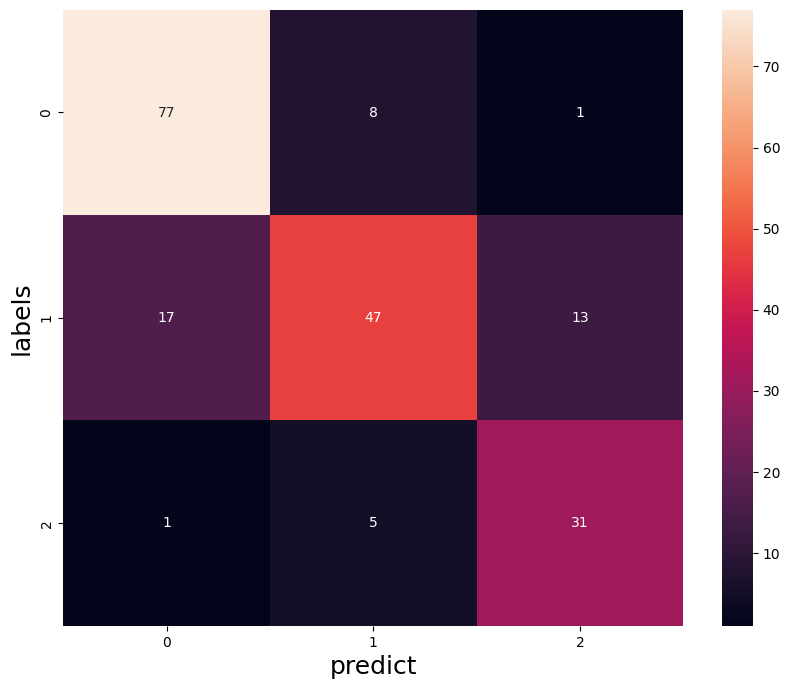

In [28]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['sentimento_tweet'].unique(), yticklabels=df['sentimento_tweet'].unique())
plt.ylabel('labels',fontsize=18)
plt.xlabel('predict',fontsize=18)

In [29]:
print(classification_report(y_test, y_pred,target_names=df['sentimento_tweet'].astype(str).unique()))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        86
           1       0.78      0.61      0.69        77
           2       0.69      0.84      0.76        37

    accuracy                           0.78       200
   macro avg       0.76      0.78      0.76       200
weighted avg       0.78      0.78      0.77       200



In [30]:
# base de test 2

In [31]:
df_test = df.sample(100, random_state=1234)

In [32]:
api_key=os.environ.get("api_key")
client = OpenAI(
    api_key=api_key,
    base_url="https://api.deepseek.com",
)

In [33]:
resp = []
k=0
for tweet in tqdm(df_test['texto_tweet']):
    # print(x)
    agent_resp = cole_data_agent(client,tweet)
    resp.append(agent_resp['user_sentiment'])
    k=k+1

100%|██████████| 100/100 [14:23<00:00,  8.63s/it]


In [34]:
k

100

In [15]:
for tweet in tqdm(df_test.iloc[k:]['texto_tweet']):
    # print(tweet)
    agent_resp = cole_data_agent(client,tweet)
    resp.append(agent_resp['user_sentiment'])
    k=k+1

100%|██████████| 17/17 [03:07<00:00, 11.06s/it]


In [35]:
df_test['sentimento_pred'] = resp
df_test['y_pred'] = np.where(df_test['sentimento_pred'] == 'Negative',0,np.where(df_test['sentimento_pred'] == 'Neutral',1,2))

In [36]:
df_test

,id,texto_tweet,idioma_tweet,sentimento_tweet,sentimento_pred,y_pred
60,595ee3ea745dc32c7a70a629,@delta @airfrance i injure my ankle attempting...,en,0,Negative,0
330,5964780c4fe31f4f52a0241c,musician friends: do not fly @airfrance they m...,en,0,Negative,0
1071,596a0103976f440300c0f5f4,@airfrance thanks! just dmed you.,en,2,Positive,2
366,5965144b4fe31f4f52a02575,@airfrance 6) we couldn't log in online and ha...,en,0,Negative,0
76,595f5c32745dc32c7a70a738,@airfrance unacceptable excuse. airlines know ...,en,0,Negative,0
...,...,...,...,...,...,...
290,5963e2bc4fe31f4f52a0234c,@thepointsguy @airfrance has dedicated busines...,en,0,Negative,0
410,595e6fc38fcd022a715f7bd5,@airfrance i tried on the website and in th...,en,1,Neutral,1
951,59600323745dc32c7a70a8dd,"@aireuropa ok, thanks, please do not hesitate ...",en,2,Positive,2
1026,5965fb794fe31f4f52a0274b,@airfrance thanks!,en,2,Positive,2


In [37]:
y_test = df_test['sentimento_tweet']
y_pred = df_test['y_pred']

In [38]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.79


Text(0.5, 58.7222222222222, 'predict')

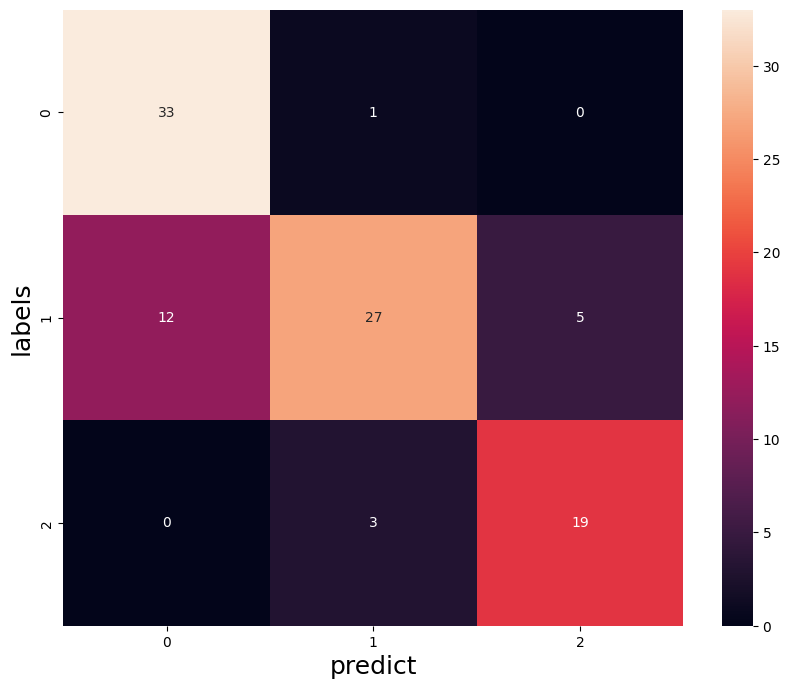

In [39]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['sentimento_tweet'].unique(), yticklabels=df['sentimento_tweet'].unique())
plt.ylabel('labels',fontsize=18)
plt.xlabel('predict',fontsize=18)

In [40]:
print(classification_report(y_test, y_pred,target_names=df['sentimento_tweet'].astype(str).unique()))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84        34
           1       0.87      0.61      0.72        44
           2       0.79      0.86      0.83        22

    accuracy                           0.79       100
   macro avg       0.80      0.82      0.79       100
weighted avg       0.81      0.79      0.78       100

